# Shortest paths
https://contest.yandex.ru/contest/44302/problems/

## Webinar is coming!

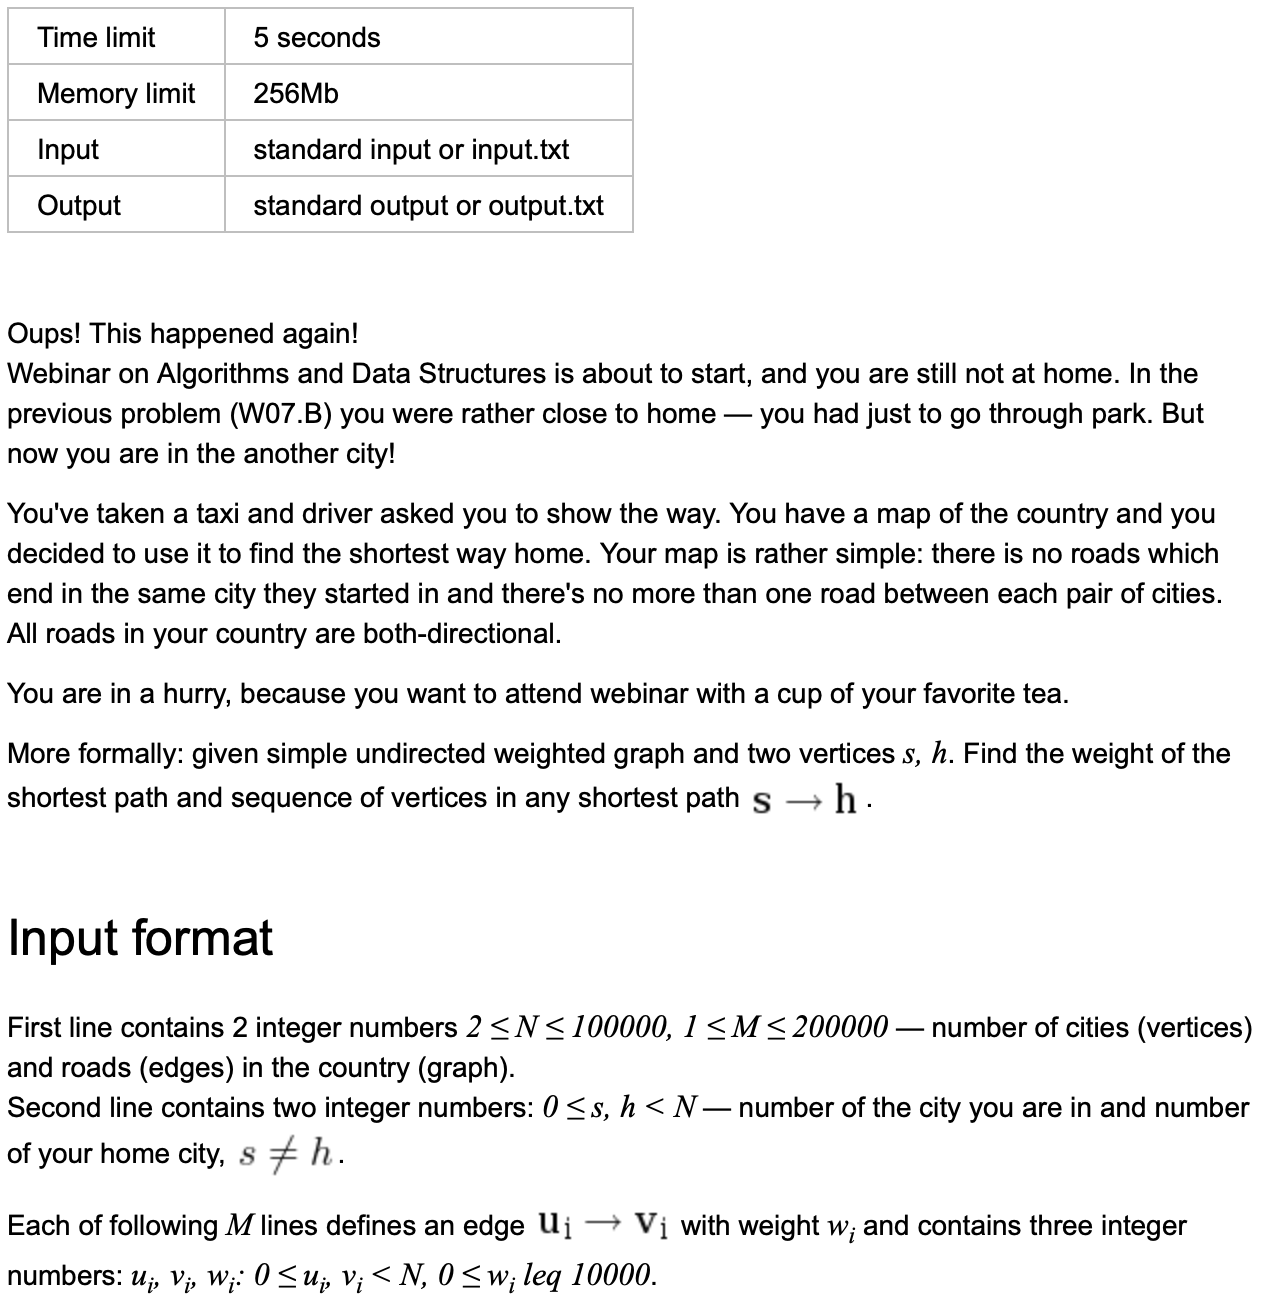

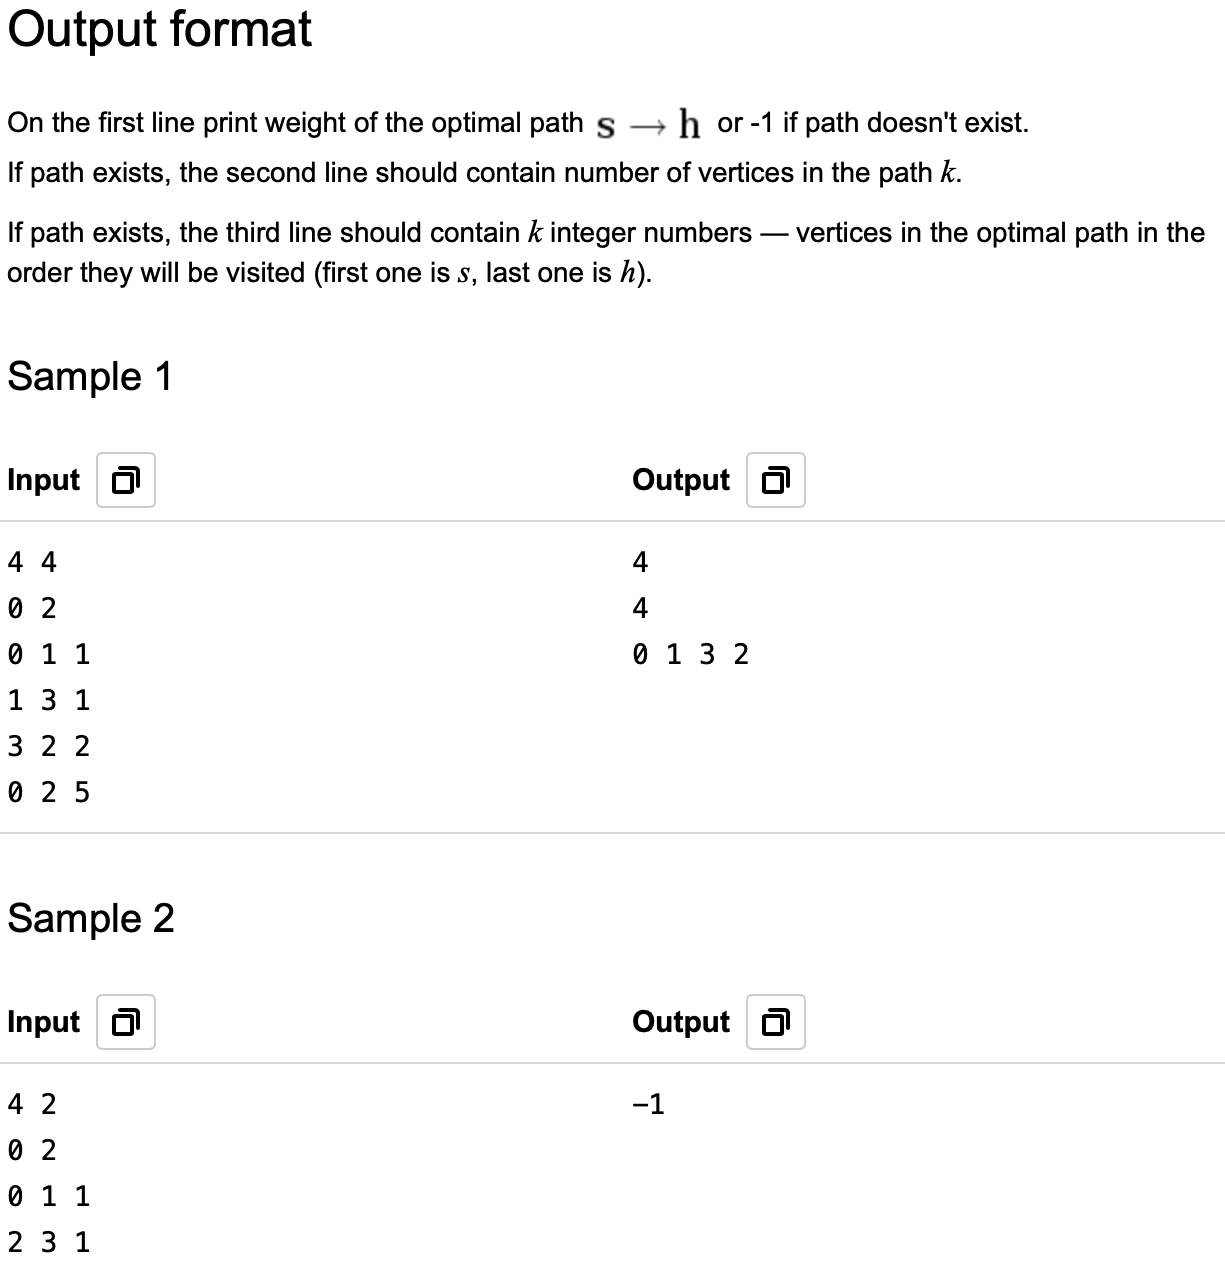

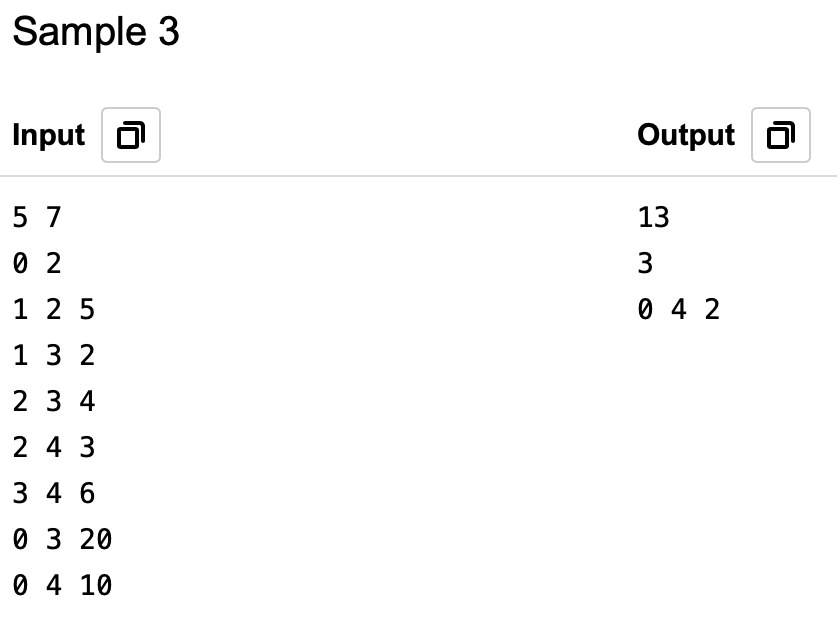

In [ ]:
from collections import defaultdict
from heapq import *


def dijkstra(g, start, finish):

    q, seen, mins = [(0, start, ())], set(), {start: 0}
    while q:
        (cost, v1, path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == finish:
                return (cost, path)

            for c, v2 in g.get(v1, ()):
                if v2 in seen:
                    continue
                prev = mins.get(v2, None)
                next = cost + c
                if prev is None or next < prev:
                    mins[v2] = next
                    heappush(q, (next, v2, path))

    return float("inf"), None


n, m = list(map(int, input().split()))
start, finish = list(map(int, input().split()))

g = defaultdict(list)
for i in range(m):
    c1, c2, ln = list(map(int, input().split()))
    g[c1].append((ln, c2))
    g[c2].append((ln, c1))

cost, path = dijkstra(g, start, finish)

if cost != float("inf"):

    first_val, second_val = path
    res = []
    res.append(first_val)
    while len(second_val) > 0:
        first_val, second_val = second_val
        res.insert(0, first_val)
    print(cost)
    print(len(res))
    print(*res)
else:
    print(-1)


## Student ID

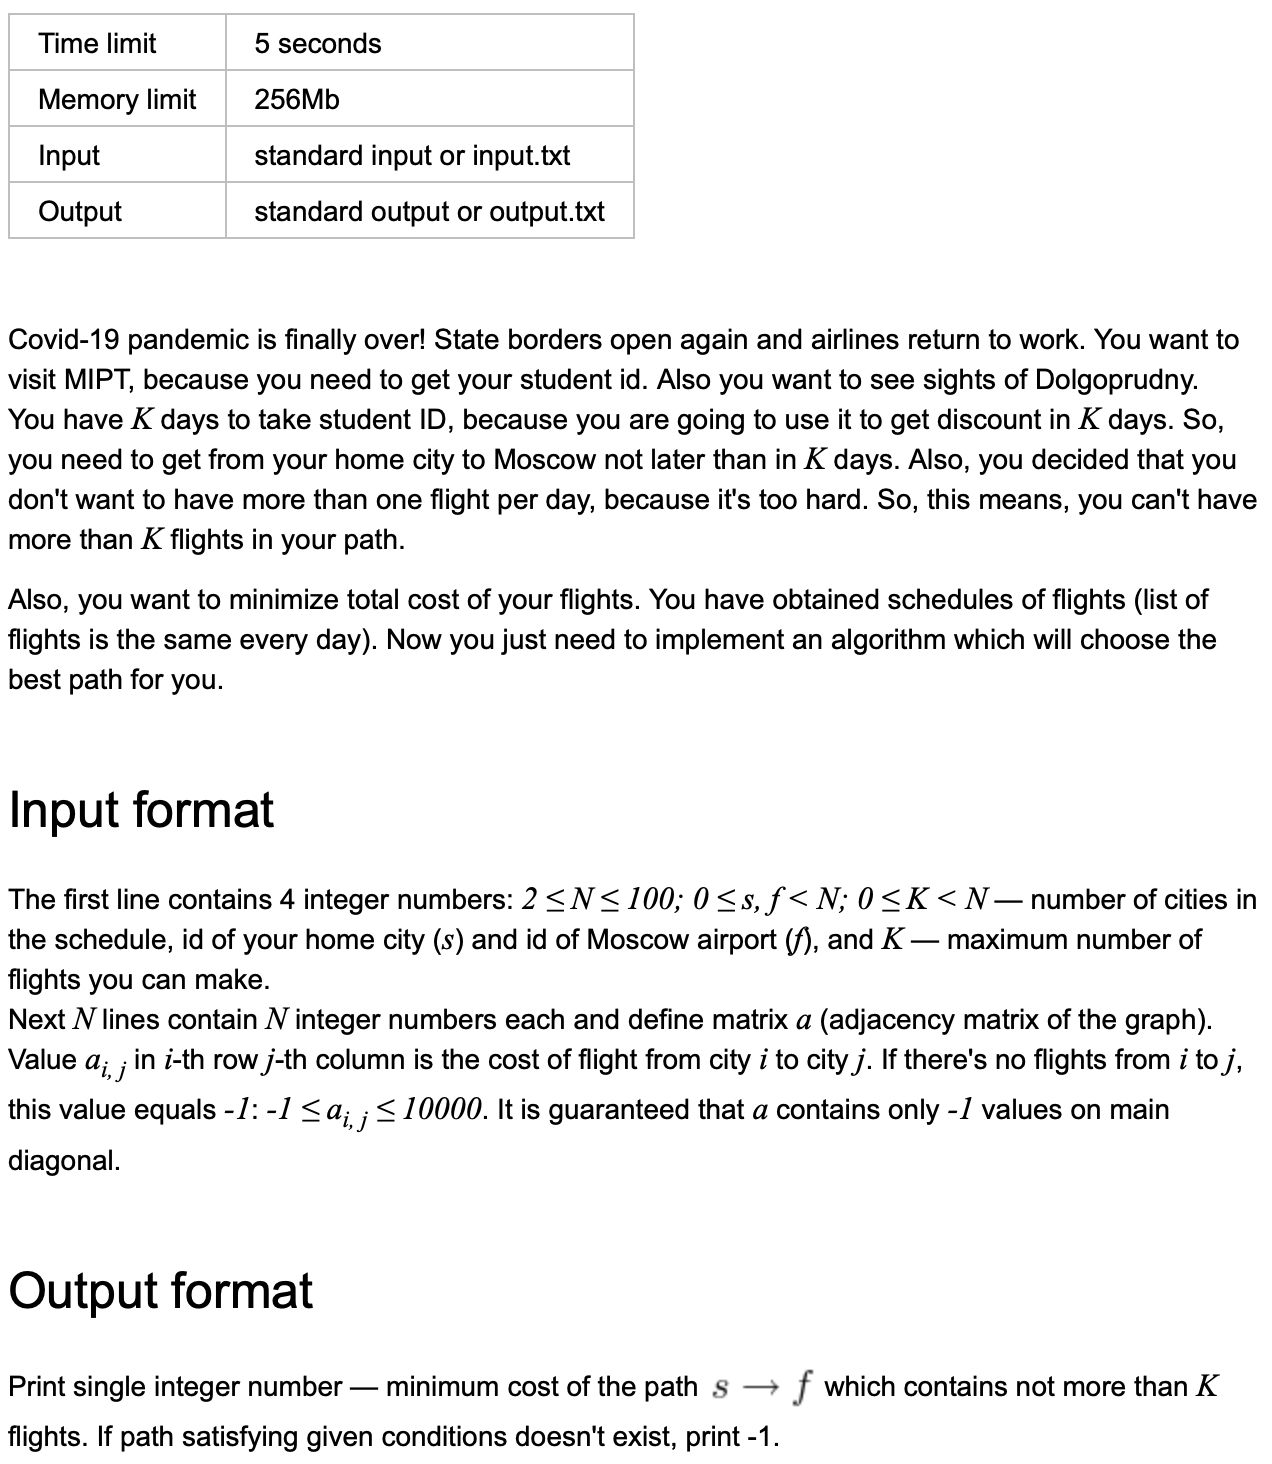

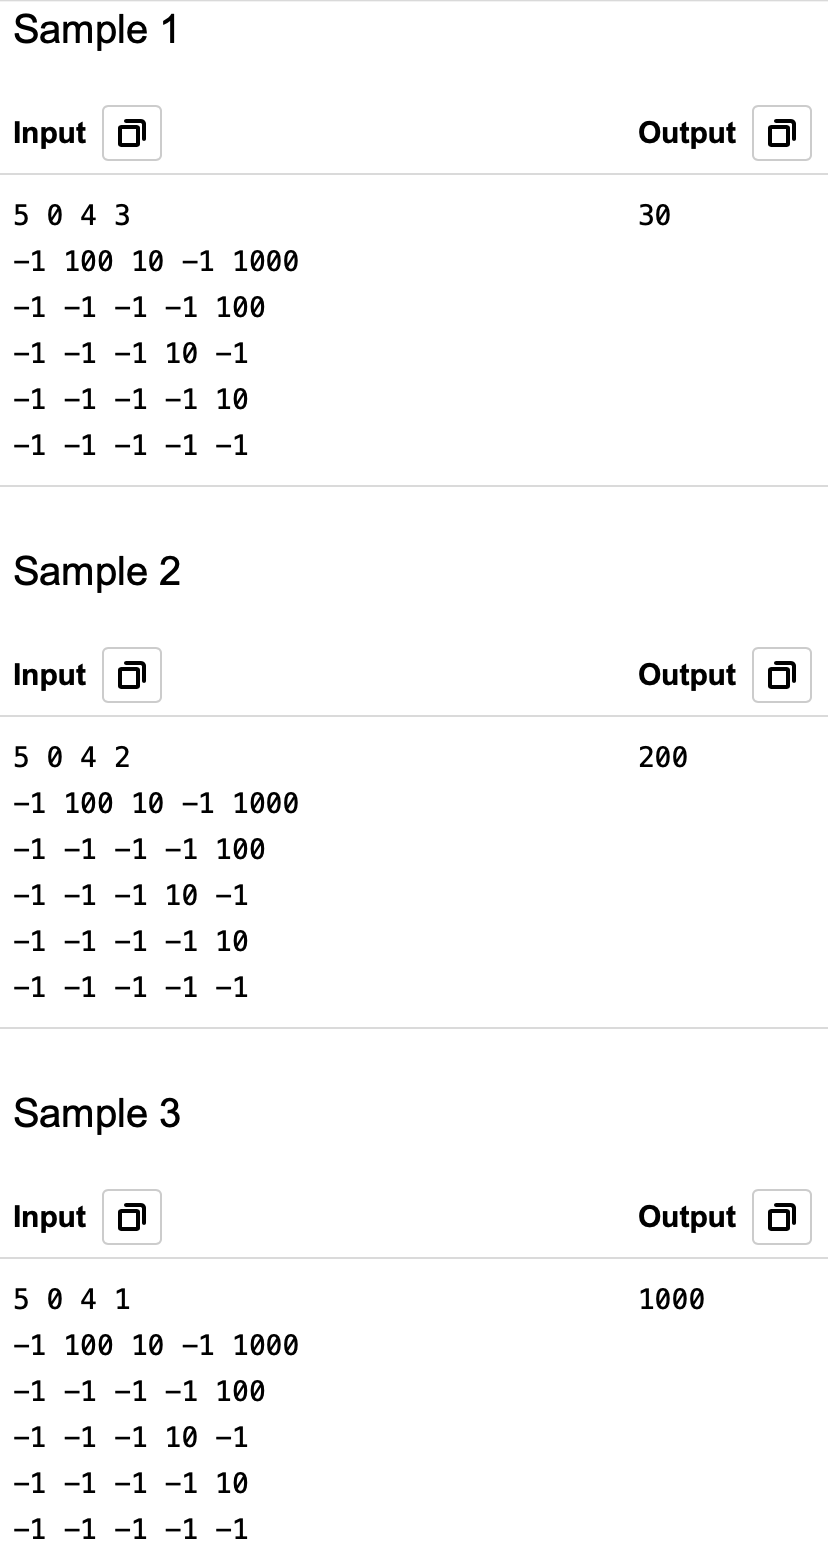

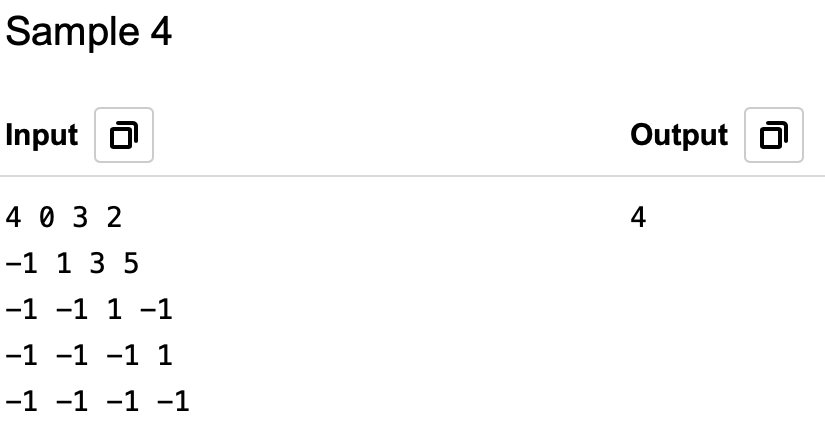

In [ ]:
n, start, finish, k = list(map(int, input().split()))

F = [[float("Inf") for i in range(n)] for i in range(k + 1)]
F[0][start] = 0
g = []
for i in range(n):
    row = list(map(int, input().split()))
    g.append(row)

res = float("Inf")
for i in range(1, k + 1):
    for j in range(n):
        F[i][j] = F[i - 1][j]
        for l in range(n):
            if g[l][j] != -1 and g[l][j] + F[i - 1][l] < F[i][j]:
                F[i][j] = g[l][j] + F[i - 1][l]

res = F[k][finish]
if res == float("Inf"):
    print(-1)
else:
    print(res)
